# 📊 Reducing Customer Churn: A Strategic Framework Using Real Data
**Real telecom data, simple tools, powerful takeaways — how to reduce churn, protect revenue, and grow loyalty.**  
Fahad Shahbaz | Georgetown University | fs719@georgetown.edu


---

We use simple data techniques (grouping, mapping, bar charts) to uncover strategic insights on:

- **🧭 Contract Type** — Why short-term customers are riskier  
- **🕰️ Tenure** — How early experience makes or breaks loyalty  
- **💸 Price Sensitivity** — Where discounting helps, and where it hurts  


![Business Partnership](handshake.png)

## Step 1. Load Data 

In [1]:

import pandas as pd

url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)


# Preview first rows
print(df.head(3))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  E

## Step 2. Quick Look at our Data

In [10]:
# Number of rows and columns
print("Shape:", df.shape)

# Columns of interest
print(df[['Churn','Contract','MonthlyCharges','tenure']].head())


Shape: (7043, 21)
  Churn        Contract  MonthlyCharges  tenure
0    No  Month-to-month           29.85       1
1    No        One year           56.95      34
2   Yes  Month-to-month           53.85       2
3    No        One year           42.30      45
4   Yes  Month-to-month           70.70       2


### 🔍 What we're asking: How Many Customers Leave?

We start with the overall churn rate — how many customers leave compared to all customers.  
This gives us a sense of the size of the problem.

## Step 3. Overall Churn Rate

In [22]:
# Turn "Yes/No" into 1/0
df['ChurnNum'] = df['Churn'].map({'Yes':1, 'No':0})

# Average = churn rate
churn_rate = df['ChurnNum'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.1f}%")


Overall Churn Rate: 26.5%


### 💡 Strategic Takeaway:  About one in four customers leave (~26%).
This is high — and it means even small improvements matter.  
For any company, lowering churn by just a few points can protect major revenue without spending more on finding new clients***.


## Step 4. Commitment Matters: Churn by Contract Type
### 🔍 What we're asking:. Are customers with short contracts more likely to leave than those who commit longer?***


In [12]:
churn_by_contract = df.groupby('Contract')['ChurnNum'].mean() * 100
print(churn_by_contract)


Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: ChurnNum, dtype: float64


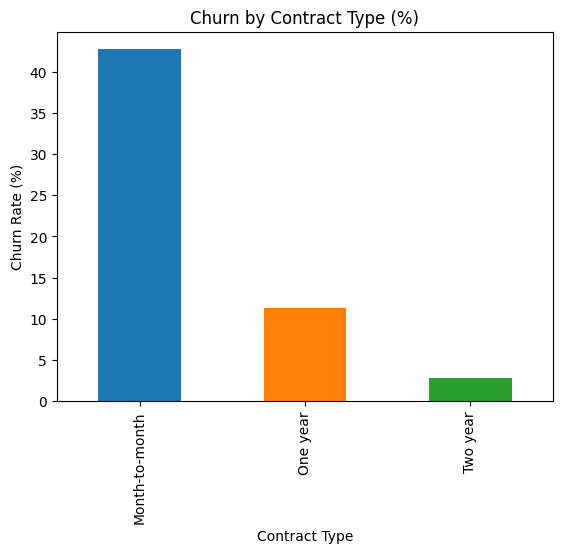

In [17]:
import matplotlib.pyplot as plt

churn_by_contract.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Churn by Contract Type (%)")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Contract Type")
plt.show()


***### 📊 Why this chart 1 matters: Short-term customers churn more — visual proof that commitment reduces risk.***

### 💡 Strategic Takeaway:  Month-to-month customers churn far more than yearly ones.  
This shows the least-committed clients are the biggest risk.  

 Encourage them to stay longer — with loyalty rewards, small annual plan discounts, or extra support.  
Every industry faces this: when people have a free exit, they’re more likely to leave unless you give them reasons to stay.


##  Step 5. Churn by Tenure

***Are new customers more fragile than those who have stayed longer? Let’s compare customers in their first year versus everyone else.***


In [14]:
# Early vs. long-tenure customers
df['TenureGroup'] = df['tenure'].apply(lambda x: 'Early' if x < 12 else 'Long')
churn_by_tenure = df.groupby('TenureGroup')['ChurnNum'].mean() * 100
print(churn_by_tenure)


TenureGroup
Early    48.284195
Long     17.490953
Name: ChurnNum, dtype: float64


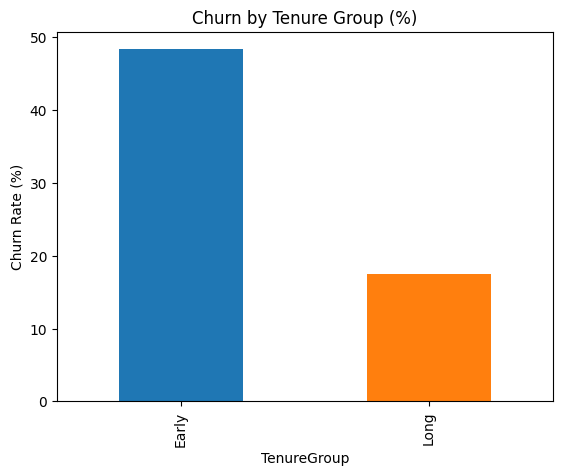

In [19]:
churn_by_tenure.plot(kind='bar', title="Churn by Tenure Group (%)", color=['#1f77b4', '#ff7f0e'])
plt.ylabel("Churn Rate (%)")
plt.show()

***### 📊 Why this chart 2 matters: New customers are the most fragile — early churn undermines long-term value.***

### 💡 Strategic Takeaway:  Early-tenure customers churn at much higher rates.  
If a customer leaves in the first months, the business never sees their lifetime value.  

Invest in strong onboarding and early positive experiences.  
The first 6–12 months are the “golden window” for turning a trial client into a loyal one.


## Step 6.  Price Sensitivity: Churn by Monthly Charges

***Finally, let’s see if churn changes by price band. Do lower- or higher-paying customers behave differently?***


In [20]:
#  Churn by simple price bands
def price_band(x):
    if x < 50: return 'Low (<$50)'
    elif x <= 80: return 'Mid ($50–$80)'
    else: return 'High (>$80)'

df['PriceBand'] = df['MonthlyCharges'].apply(price_band)
churn_by_price = df.groupby('PriceBand')['ChurnNum'].mean().sort_values() * 100
print(churn_by_price)


PriceBand
Low (<$50)       15.736704
Mid ($50–$80)    28.900624
High (>$80)      33.983496
Name: ChurnNum, dtype: float64


### 💡 Strategic Takeaway: 
Some price bands churn more than others — showing clear price sensitivity.  The price band thresholds (<$50, $50–$80, >$80) seem arbitrary. Add a brief note explaining why you chose them, e.g., “These bands reflect common pricing tiers in telecom subscriptions.” This shows thoughtfulness.

Instead of discounting for everyone, target offers and service improvements to the most at-risk price group.  
This keeps margins healthier while focusing effort where it matters most.


# Executive Summary: Lessons Any Firm Can Use

- **Churn is high (~26%)** → even small improvements protect big revenue.  
- **Least-committed clients leave most** → loyalty incentives or annual nudges help.  
- **New customers are fragile** → the first months are the golden window; strong onboarding reduces quick exits.  
- **Price sensitivity shows up** (optional) → smarter, targeted offers beat blanket discounts.  

**Why this matters:**  
These lessons apply beyond telecom. Banks, consultancies, and financial firms all face the same challenge: protect current clients, build commitment, and focus resources where risk is highest.  
That’s how data turns into strategy.


# Industry Relevance

For [COMPANY NAME], these lessons are directly applicable.  
Just as telecoms must retain subscribers, [COMPANY NAME] must retain its most valuable clients.  
Focusing on commitment, onboarding, and risk-targeted offers strengthens relationships, stabilizes revenue,  
and builds long-term trust — critical for success in [COMPANY NAME]’s industry.
For [SaaS Company], I’d analyze user engagement data to identify at-risk subscribers, similar to this telecom churn analysis.